## Favre Victor et Badiel Dane

In [76]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

(4375, 14)


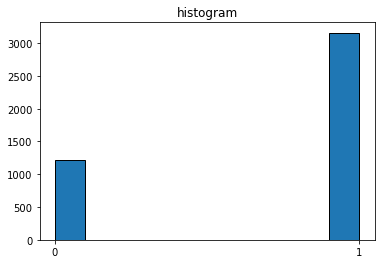

In [77]:
data = pd.read_csv("credit_scoring.csv",sep = ';')
data_ar = data.to_numpy()
print(np.shape(data_ar))

positive = data_ar[data_ar[:,13] == 1]
negative = data_ar[data_ar[:,13] == 0]

plt.hist(data_ar[:,13], ec="k")
plt.xticks((0,1))
plt.title("histogram")
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
X = data_ar[:,:13]
y = data_ar[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [79]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188



KNeighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.31      0.39       604
         1.0       0.77      0.88      0.82      1584

    accuracy                           0.72      2188
   macro avg       0.64      0.60      0.60      2188
weighted avg       0.70      0.72      0.70      2188



In [81]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(40,20),activation="relu").fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.36      0.47      0.41       604
         1.0       0.77      0.68      0.73      1584

    accuracy                           0.63      2188
   macro avg       0.57      0.58      0.57      2188
weighted avg       0.66      0.63      0.64      2188



Compte tenu du principe du credit score il est plus intéressant de chercher a maximiser la precision du 1 que le reste.
on remarque sur la précision que tout les algorithme sont similaire meme si le neural network est en tete avec 74% d'accuracy. Cependant si l'on regarde la precision sur 1 le deicison tree est dans ce cas ben meilleur que les autre etant donné qu'il atteint 82% de precision compraré aux autre qui atteigne 75 ou 77 %

# normalisation et standardisation

In [82]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_standar = sc_X.fit_transform(X_train)
X_test_standar = sc_X.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [83]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train_standar,y_train)
y_pred = clf.predict(X_test_standar)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.66      2188
weighted avg       0.73      0.73      0.73      2188



In [84]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train_minmax,y_train)
y_pred = clf.predict(X_test_minmax)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188



In [85]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_standar, y_train)
y_pred = neigh.predict(X_test_standar)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.47      0.51       604
         1.0       0.81      0.86      0.83      1584

    accuracy                           0.75      2188
   macro avg       0.69      0.67      0.67      2188
weighted avg       0.74      0.75      0.75      2188



In [86]:
neigh.fit(X_train, y_train)
y_pred = clf.predict(X_test_minmax)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188



In [87]:
mlp = MLPClassifier(hidden_layer_sizes=(40,20),activation="relu")
mlp.fit(X_train_standar, y_train)
y_pred = mlp.predict(X_test_standar)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.57      0.59       604
         1.0       0.84      0.86      0.85      1584

    accuracy                           0.78      2188
   macro avg       0.73      0.72      0.72      2188
weighted avg       0.78      0.78      0.78      2188



In [88]:
mlp.fit(X_train_minmax, y_train)
y_pred = mlp.predict(X_test_minmax)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.54      0.60       604
         1.0       0.84      0.89      0.86      1584

    accuracy                           0.80      2188
   macro avg       0.75      0.72      0.73      2188
weighted avg       0.79      0.80      0.79      2188



Suite a la normalisation ou la standardisation on remarque une forte augmentation des réusulats pour le neural network de l'odre de de 7 a 9 % pour la précision est de 2 a 3 % d'accuracy. Quand aux autre algorithmes le decision tree n'est pas impacté par la normalisation et la KN quand a lui gagne 5 % de precision. On peux aussi remarquer des differences sur les résultat en fonction de si la standarsisation ou la normalisation est utilisé ...

PCA

In [89]:
from sklearn.decomposition import PCA
pca = PCA()
pca_train = pca.fit_transform(X_train_standar)
X_train_pca = np.concatenate([X_train_standar,pca_train[:,:3]], axis = 1)
pca_test = pca.transform(X_test_standar)
X_test_pca = np.concatenate([X_test_standar,pca_test[:,:3]], axis = 1)

In [90]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.58      0.55       604
         1.0       0.83      0.80      0.81      1584

    accuracy                           0.74      2188
   macro avg       0.68      0.69      0.68      2188
weighted avg       0.75      0.74      0.74      2188



In [91]:
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.47      0.52       604
         1.0       0.81      0.87      0.84      1584

    accuracy                           0.76      2188
   macro avg       0.69      0.67      0.68      2188
weighted avg       0.74      0.76      0.75      2188



In [92]:
mlp = MLPClassifier(hidden_layer_sizes=(40,20),activation="relu")
mlp.fit(X_train_pca, y_train)
y_pred = mlp.predict(X_test_pca)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.50      0.54       604
         1.0       0.82      0.87      0.84      1584

    accuracy                           0.77      2188
   macro avg       0.71      0.69      0.69      2188
weighted avg       0.76      0.77      0.76      2188



Suite a la PCA on remarque que l'impact général est res faible et n'entraine une augmentation de precision et d'accuracy de l'odre de 1% et entraine meme une perte de 1% de precision pour certain algothime comme le Neural Network

# Sélection de variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


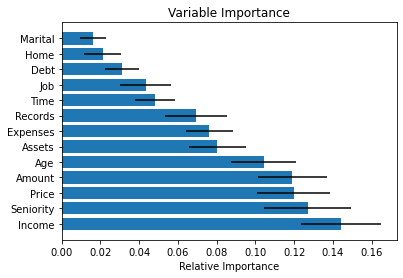

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_standar,y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
nom_cols = data.columns
features = nom_cols #see if it's well organized
print(features[sorted_idx])
padding = np.arange(X_train_standar.size/len(X_train_standar)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

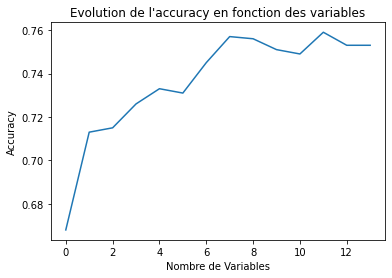

In [94]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_standar.shape[1]+1)
for f in np.arange(0, X_train_standar.shape[1]+1):
    X1_f = X_train_standar[:,sorted_idx[:f+1]]
    X2_f = X_test_standar[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(metrics.accuracy_score(y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

Suite au graph précedent on peut conclure que la nombre optimale de variable est de 7 car l'ajout de variable entraien ou une perte d'accuracy de l'odre de 0.01 ou aucune amélioration

retest with only the 7 best features

In [95]:
X_train_best = X_train_standar[:,sorted_idx[:7]]
X_test_best = X_test_standar[:,sorted_idx[:7]]

# GridSearch

### Decision tree grid search

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth':[2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3]
}

clf = tree.DecisionTreeClassifier(random_state=1)
'''
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
'''
clf = GridSearchCV(clf, parameters, scoring='accuracy',cv=10, verbose=False)
clf.fit(X_train_pca, y_train)
scoring = clf.cv_results_
clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

### grid search KN neighbours

In [22]:
parameters = {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'leaf_size' : [1,2,3,4,5,10,30,40],
    'p':[1,2],
    'algorithm':['ball_tree', 'kd_tree', 'brute']
}
neigh = KNeighborsClassifier()
'''
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
'''
clf = GridSearchCV(neigh, parameters, scoring='accuracy',cv=10, verbose=False)
clf.fit(X_train_pca, y_train)
scoring = clf.cv_results_
clf.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'p': 2}

### GridSearch multi layer perceptron

In [23]:

parameters = {
    'activation' : ["identity","logistic","tanh","relu"],
    'hidden_layer_sizes':[(80,40),(50,15),(60,40),(60,30)],
    'alpha':[0.001,0.00005,0.0001,0.0005]
}

mlp = MLPClassifier(random_state = 1,solver = 'adam',learning_rate = "adaptive")
'''
mlp.fit(X_train_pca, y_train)
y_pred = mlp.predict(X_test_pca)
'''
clf = GridSearchCV(mlp, parameters, scoring='accuracy',cv=10, verbose=False)
clf.fit(X_train_pca, y_train)
scoring = clf.cv_results_
clf.best_params_

{'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (60, 40)}

# Pipeline

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pickle

pipe = Pipeline([
    ('scaler',StandardScaler),
    ('pca', PCA(n_components = 3)),
    ('tree', tree.DecisionTreeClassifier(random_state=1, max_depth= 4, min_samples_leaf= 1))
])

with open('pipeline.pickle', 'wb') as handle:
    pickle.dump(pipe, handle, protocol=pickle.HIGHEST_PROTOCOL)

# or if we can use joblib
#import joblib
#from sklearn.externals import joblib
#joblib.dump(pipeline, 'pipeline.pkl')

# Comparaison d'algorithmes

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

clfs = {
    'TREE': tree.DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1, random_state=1),
    'KNN': KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 1, n_neighbors= 9, p= 2),
    'Bayes': GaussianNB(),
    'CART': tree.DecisionTreeClassifier(random_state=1),
    'ID30': tree.DecisionTreeClassifier(random_state=1,criterion = "entropy"),
    'MLP': MLPClassifier(random_state = 1,solver = 'adam',learning_rate = "adaptive"),
    'neihgbors':KNeighborsClassifier(),
    'bagging':BaggingClassifier(n_estimators=50, random_state=1),
    'ADA': AdaBoostClassifier(n_estimators=50, random_state=0),
    'RNDForest':RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
}
def run_classifiers(_clfs, _X, _y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in _clfs:
        clf = _clfs[i]
        cv_acc = cross_val_score(clf, _X, _y, cv=kf, scoring= "precision")
        auc = cross_val_score(clf, _X, _y, cv=kf, scoring= 'roc_auc')
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} roc is: {3:.3f} +/- {4:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc), np.mean(auc), np.std(auc)))

run_classifiers(clfs,X_train_pca,y_train)

Accuracy for TREE is: 0.805 +/- 0.033 roc is: 0.757 +/- 0.038
Accuracy for KNN is: 0.796 +/- 0.032 roc is: 0.766 +/- 0.018
Accuracy for Bayes is: 0.820 +/- 0.032 roc is: 0.773 +/- 0.033
Accuracy for CART is: 0.804 +/- 0.030 roc is: 0.646 +/- 0.028
Accuracy for ID30 is: 0.790 +/- 0.036 roc is: 0.627 +/- 0.032
Accuracy for MLP is: 0.834 +/- 0.029 roc is: 0.834 +/- 0.019
Accuracy for neihgbors is: 0.797 +/- 0.032 roc is: 0.741 +/- 0.019
Accuracy for bagging is: 0.808 +/- 0.030 roc is: 0.792 +/- 0.024
Accuracy for ADA is: 0.815 +/- 0.029 roc is: 0.818 +/- 0.029
Accuracy for RNDForest is: 0.778 +/- 0.034 roc is: 0.818 +/- 0.022


sur l'enssemble des algothimes testés on peux remarqué que ceux ci performe en générale de manière tout a fait convenable ceux ci étant tous autour de 80% de précision. On peux tout de meme remarqué que parmis tous celui ayant obtenu la meilleur précision est le Neural Network qui obtient la meilleur précision et roc score. Le second meilleur est Bayes qui arrive a etre meilleur que les 2 autres algothimes que nous avons tuner. Il pourai donc etre interessant de changer les hypermaramètre de celui pour voir qu'elle résultats peuvent etre obtenue

# Données hétérogènes

In [226]:
credit_data = pd.read_csv("credit.data", sep = '\t', header = None)
print(credit_data)

    0      1       2  3  4   5   6     7  8  9   10 11 12   13   14 15
0    b  30.83   0.000  u  g   w   v  1.25  t  t   1  f  g  202    0  +
1    a  58.67   4.460  u  g   q   h  3.04  t  t   6  f  g   43  560  +
2    a  24.50   0.500  u  g   q   h  1.50  t  f   0  f  g  280  824  +
3    b  27.83   1.540  u  g   w   v  3.75  t  t   5  t  g  100    3  +
4    b  20.17   5.625  u  g   w   v  1.71  t  f   0  f  s  120    0  +
..  ..    ...     ... .. ..  ..  ..   ... .. ..  .. .. ..  ...  ... ..
683  b  21.08  10.085  y  p   e   h  1.25  f  f   0  f  g  260    0  -
684  a  22.67   0.750  u  g   c   v  2.00  f  t   2  t  g  200  394  -
685  a  25.25  13.500  y  p  ff  ff  2.00  f  t   1  t  g  200    1  -
686  b  17.92   0.205  u  g  aa   v  0.04  f  f   0  f  g  280  750  -
687  b  35.00   3.375  u  g   c   h  8.29  f  f   0  t  g    0    0  -

[688 rows x 16 columns]


In [227]:
data_ar = credit_data.to_numpy()
print(np.shape(data_ar))

(688, 16)


In [263]:
credit_data.replace('+', 1, inplace=True)
credit_data.replace('-', 0, inplace=True)
credit_data[1].replace('?', np.nan, inplace=True)
credit_data[1] = credit_data[1].astype(float) #désolé on avait plus le temps
credit_data[13].replace('?', np.nan, inplace=True)
credit_data[13] = credit_data[1].astype(float)

In [264]:
number = credit_data.select_dtypes(include='number')
number = number.iloc[: , :-1]
number = number.astype(float)
number.dropna(axis = 0, inplace=True)
number.replace('?',np.nan, inplace=True)
number.dropna(inplace=True)

print("il y a en tout",credit_data[credit_data.iloc[:,-1] == 1].shape[0],"cas positif")
print("il y a en tout",credit_data[credit_data.iloc[:,-1] == 0].shape[0],"cas negatif")

il y a en tout 305 cas positif
il y a en tout 383 cas negatif


In [265]:
X = credit_data.iloc[:,:15]
y = credit_data.iloc[:,15]

In [249]:
run_classifiers(clfs,number.to_numpy(),y)

Accuracy for TREE is: 0.797 +/- 0.095 roc is: 0.812 +/- 0.046
Accuracy for KNN is: 0.732 +/- 0.075 roc is: 0.759 +/- 0.058
Accuracy for Bayes is: 0.835 +/- 0.088 roc is: 0.804 +/- 0.062
Accuracy for CART is: 0.643 +/- 0.080 roc is: 0.681 +/- 0.057
Accuracy for ID30 is: 0.676 +/- 0.073 roc is: 0.703 +/- 0.052
Accuracy for MLP is: 0.712 +/- 0.115 roc is: 0.776 +/- 0.068
Accuracy for neihgbors is: 0.723 +/- 0.100 roc is: 0.736 +/- 0.044
Accuracy for bagging is: 0.756 +/- 0.057 roc is: 0.810 +/- 0.039
Accuracy for ADA is: 0.796 +/- 0.057 roc is: 0.842 +/- 0.048
Accuracy for RNDForest is: 0.819 +/- 0.067 roc is: 0.851 +/- 0.039


On remarque qu'une partie de nos algorthimes on eu une perte de précision engendré par le fait de prédire seulement sur les valeurs numérique.

In [250]:
sc_X = StandardScaler()
X_standar = sc_X.fit_transform(number)

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(number)

In [251]:
run_classifiers(clfs,X_standar,y)

Accuracy for TREE is: 0.797 +/- 0.095 roc is: 0.812 +/- 0.046
Accuracy for KNN is: 0.768 +/- 0.083 roc is: 0.795 +/- 0.061
Accuracy for Bayes is: 0.835 +/- 0.088 roc is: 0.804 +/- 0.062
Accuracy for CART is: 0.645 +/- 0.081 roc is: 0.682 +/- 0.057
Accuracy for ID30 is: 0.675 +/- 0.075 roc is: 0.703 +/- 0.052
Accuracy for MLP is: 0.816 +/- 0.084 roc is: 0.831 +/- 0.058
Accuracy for neihgbors is: 0.755 +/- 0.089 roc is: 0.765 +/- 0.065


KeyboardInterrupt: 

In [ ]:
run_classifiers(clfs,X_minmax,y)

On remarque que comme prédcédement la normalisation et la standardisation permet seulement a une partie des algorthimes (Neural network,bayes ...) d'obtenir un gain de précision et de ROC.

In [299]:
col_num = credit_data.select_dtypes(include='number').columns
col_num = col_num[:-1]
col_cat = credit_data[credit_data.columns.difference(col_num)].columns
col_cat = col_cat[:-1]

In [300]:
print(col_num)
print(col_cat)

Int64Index([1, 2, 7, 10, 13, 14], dtype='int64')
Int64Index([0, 3, 4, 5, 6, 8, 9, 11, 12], dtype='int64')


In [301]:
X_cat = credit_data.loc[:,col_cat].to_numpy()
print(X_cat)

[['b' 'u' 'g' 'w' 'v' 't' 't' 'f' 'g']
 ['a' 'u' 'g' 'q' 'h' 't' 't' 'f' 'g']
 ['a' 'u' 'g' 'q' 'h' 't' 'f' 'f' 'g']
 ['b' 'u' 'g' 'w' 'v' 't' 't' 't' 'g']
 ['b' 'u' 'g' 'w' 'v' 't' 'f' 'f' 's']
 ['b' 'u' 'g' 'm' 'v' 't' 'f' 't' 'g']
 ['b' 'u' 'g' 'r' 'h' 't' 'f' 't' 'g']
 ['a' 'u' 'g' 'cc' 'v' 't' 'f' 'f' 'g']
 ['b' 'y' 'p' 'k' 'h' 't' 'f' 'f' 'g']
 ['b' 'y' 'p' 'w' 'v' 't' 'f' 't' 'g']
 ['b' 'u' 'g' 'c' 'h' 'f' 'f' 't' 'g']
 ['b' 'u' 'g' 'c' 'h' 't' 'f' 'f' 'g']
 ['a' 'u' 'g' 'k' 'v' 't' 'f' 't' 'g']
 ['b' 'u' 'g' 'k' 'v' 'f' 'f' 'f' 'g']
 ['a' 'u' 'g' 'q' 'v' 't' 't' 't' 'g']
 ['b' 'y' 'p' 'k' 'v' 't' 't' 't' 'g']
 ['b' 'u' 'g' 'm' 'v' 't' 't' 't' 'g']
 ['a' 'u' 'g' 'q' 'v' 't' 't' 'f' 'g']
 ['b' 'u' 'g' 'd' 'h' 't' 'f' 't' 'g']
 ['a' 'u' 'g' 'cc' 'h' 't' 't' 'f' 'g']
 ['b' 'u' 'g' 'c' 'v' 't' 't' 'f' 'g']
 ['b' 'u' 'g' 'c' 'v' 't' 'f' 'f' 's']
 ['a' 'u' 'g' 'c' 'v' 't' 't' 't' 'g']
 ['a' 'u' 'g' 'x' 'h' 't' 't' 'f' 'g']
 ['a' 'u' 'g' 'q' 'v' 't' 't' 't' 'g']
 ['a' 'u' 'g' 'c' 'h' '

In [302]:
from sklearn.impute import SimpleImputer as Imputer
X_cat = np.copy(credit_data.loc[:,col_cat].to_numpy())
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [303]:
print(X_cat)

[[2 2 1 13 8 1 1 0 0]
 [1 2 1 11 4 1 1 0 0]
 [1 2 1 11 4 1 0 0 0]
 [2 2 1 13 8 1 1 1 0]
 [2 2 1 13 8 1 0 0 2]
 [2 2 1 10 8 1 0 1 0]
 [2 2 1 12 4 1 0 1 0]
 [1 2 1 3 8 1 0 0 0]
 [2 3 3 9 4 1 0 0 0]
 [2 3 3 13 8 1 0 1 0]
 [2 2 1 2 4 0 0 1 0]
 [2 2 1 2 4 1 0 0 0]
 [1 2 1 9 8 1 0 1 0]
 [2 2 1 9 8 0 0 0 0]
 [1 2 1 11 8 1 1 1 0]
 [2 3 3 9 8 1 1 1 0]
 [2 2 1 10 8 1 1 1 0]
 [1 2 1 11 8 1 1 0 0]
 [2 2 1 4 4 1 0 1 0]
 [1 2 1 3 4 1 1 0 0]
 [2 2 1 2 8 1 1 0 0]
 [2 2 1 2 8 1 0 0 2]
 [1 2 1 2 8 1 1 1 0]
 [1 2 1 14 4 1 1 0 0]
 [1 2 1 11 8 1 1 1 0]
 [1 2 1 2 4 1 1 0 0]
 [1 2 1 7 1 1 1 1 0]
 [2 2 1 4 1 1 1 1 0]
 [2 2 1 5 4 1 1 0 0]
 [2 2 1 13 8 1 1 1 0]
 [2 2 1 1 8 1 1 1 0]
 [2 2 1 14 4 1 1 0 0]
 [2 2 1 7 1 1 1 1 0]
 [1 2 1 5 8 1 0 1 0]
 [1 2 1 11 8 1 1 1 0]
 [2 2 1 13 8 1 1 1 0]
 [2 2 1 3 4 1 1 1 0]
 [1 2 1 14 4 1 1 1 0]
 [2 3 3 3 8 1 1 0 0]
 [2 2 1 6 3 1 1 1 0]
 [2 2 1 2 8 1 1 1 0]
 [2 2 1 2 4 1 1 0 0]
 [2 2 1 13 4 1 1 0 0]
 [2 2 1 13 8 1 1 1 0]
 [2 3 3 2 8 1 1 0 0]
 [2 2 1 2 4 1 1 1 0]
 [1 3 3 11 4 1

In [304]:
X_num = np.copy(credit_data.loc[:,col_num].to_numpy())
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)
print(np.shape(X_num))

(688, 6)


In [305]:
from sklearn.preprocessing import OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
print(X_cat_bin)

[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]]


In [306]:
processed_data = np.column_stack((X_cat_bin,X_num))

In [307]:
processed_data

array([[  0.  ,   1.  ,   0.  , ...,   1.  ,  30.83,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,   6.  ,  58.67, 560.  ],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  24.5 , 824.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   1.  ,  25.25,   1.  ],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,  17.92, 750.  ],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,  35.  ,   0.  ]])

In [308]:
run_classifiers(clfs, processed_data, y)

Accuracy for TREE is: 0.821 +/- 0.069 roc is: 0.895 +/- 0.019
Accuracy for KNN is: 0.740 +/- 0.110 roc is: 0.764 +/- 0.056
Accuracy for Bayes is: 0.849 +/- 0.062 roc is: 0.915 +/- 0.038
Accuracy for CART is: 0.777 +/- 0.045 roc is: 0.804 +/- 0.035
Accuracy for ID30 is: 0.770 +/- 0.054 roc is: 0.794 +/- 0.034
Accuracy for MLP is: 0.804 +/- 0.112 roc is: 0.835 +/- 0.094
Accuracy for neihgbors is: 0.744 +/- 0.080 roc is: 0.753 +/- 0.056
Accuracy for bagging is: 0.851 +/- 0.063 roc is: 0.920 +/- 0.026
Accuracy for ADA is: 0.821 +/- 0.068 roc is: 0.916 +/- 0.032
Accuracy for RNDForest is: 0.852 +/- 0.065 roc is: 0.931 +/- 0.026


## TODO analyse result

# Feature engeneering et Classification

In [311]:
sms_data = pd.read_csv("SMSSpamCollection.data", sep = '\t', header = None)
print(sms_data)

         0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [320]:
sms_data.replace({'ham':1,'spam':0}, inplace=True)

In [315]:
text_array = sms_data.iloc[:,1].to_numpy()

In [357]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english', max_features = 500)
X_train_counts = count_vect.fit_transform(text_array)

In [330]:
run_classifiers(clfs, X_train_counts, sms_data.iloc[:,0])

Accuracy for TREE is: 0.930 +/- 0.013 roc is: 0.754 +/- 0.037
Accuracy for KNN is: 0.918 +/- 0.014 roc is: 0.919 +/- 0.018
Accuracy for Bayes is: nan +/- nan roc is: nan +/- nan
Accuracy for CART is: 0.978 +/- 0.007 roc is: 0.928 +/- 0.021
Accuracy for ID30 is: 0.976 +/- 0.008 roc is: 0.921 +/- 0.023
Accuracy for MLP is: 0.985 +/- 0.003 roc is: 0.978 +/- 0.010
Accuracy for neihgbors is: 0.933 +/- 0.013 roc is: 0.909 +/- 0.024
Accuracy for bagging is: 0.981 +/- 0.007 roc is: 0.979 +/- 0.005
Accuracy for ADA is: 0.976 +/- 0.006 roc is: 0.967 +/- 0.010
Accuracy for RNDForest is: 0.897 +/- 0.011 roc is: 0.962 +/- 0.011


In [369]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid = TfidfTransformer(smooth_idf=False)
weigh = tfid.fit_transform(X_train_counts)

In [409]:
pipe = Pipeline([('count', CountVectorizer(stop_words='english', max_features = 500)),
                 ('tfid', TfidfTransformer(smooth_idf=False))])

In [410]:
result = pipe.fit_transform(text_array)

In [412]:
run_classifiers(clfs, result, sms_data.iloc[:,0])

Accuracy for TREE is: 0.930 +/- 0.012 roc is: 0.756 +/- 0.031
Accuracy for KNN is: 0.916 +/- 0.014 roc is: 0.907 +/- 0.028
Accuracy for Bayes is: nan +/- nan roc is: nan +/- nan
Accuracy for CART is: 0.979 +/- 0.006 roc is: 0.923 +/- 0.025
Accuracy for ID30 is: 0.976 +/- 0.007 roc is: 0.914 +/- 0.025
Accuracy for MLP is: 0.985 +/- 0.003 roc is: 0.982 +/- 0.008
Accuracy for neihgbors is: 0.936 +/- 0.012 roc is: 0.908 +/- 0.025
Accuracy for bagging is: 0.983 +/- 0.006 roc is: 0.980 +/- 0.005
Accuracy for ADA is: 0.976 +/- 0.005 roc is: 0.964 +/- 0.008
Accuracy for RNDForest is: 0.899 +/- 0.010 roc is: 0.962 +/- 0.009


In [413]:
from sklearn.decomposition import TruncatedSVD
pipe = Pipeline([('count', CountVectorizer(stop_words='english', max_features = 500)),
                 ('tfid', TfidfTransformer(smooth_idf=False)),
                 ('svdt', TruncatedSVD(n_components=143))])

In [414]:
result = pipe.fit_transform(text_array)
run_classifiers(clfs, result, sms_data.iloc[:,0])

Accuracy for TREE is: 0.967 +/- 0.006 roc is: 0.920 +/- 0.019
Accuracy for KNN is: 0.962 +/- 0.007 roc is: 0.963 +/- 0.011
Accuracy for Bayes is: 0.977 +/- 0.008 roc is: 0.933 +/- 0.016
Accuracy for CART is: 0.975 +/- 0.007 roc is: 0.903 +/- 0.028
Accuracy for ID30 is: 0.975 +/- 0.006 roc is: 0.904 +/- 0.026
Accuracy for MLP is: 0.984 +/- 0.004 roc is: 0.986 +/- 0.008
Accuracy for neihgbors is: 0.966 +/- 0.005 roc is: 0.953 +/- 0.009
Accuracy for bagging is: 0.976 +/- 0.008 roc is: 0.970 +/- 0.010
Accuracy for ADA is: 0.978 +/- 0.008 roc is: 0.976 +/- 0.011
Accuracy for RNDForest is: 0.944 +/- 0.011 roc is: 0.966 +/- 0.014


In [417]:
data = pd.read_csv("yelp-text-by-stars.csv", sep =';')
print(data)

       Stars                                               Text
0          1  Boarded my English Mastiff here over New Year'...
1          1  Another case of the Emperor's New Clothes.  So...
2          1  Came on Valentine's Day night having pre-bough...
3          1  2Nd time eating here today.1st time was great ...
4          1  Allegiant is a disaster.  Their fares are chea...
...      ...                                                ...
47366      5  This is our favorite coffee place in Montreal!...
47367      5  Had to visit the Carlos bakery and went on a s...
47368      5  Some of the best Tom Yum we've ever had. Also ...
47369      5  This is the best groomer in the valley, she is...
47370      5  I agree with the other reviewers: this is a gr...

[47371 rows x 2 columns]


In [421]:
text = data.iloc[:,1]
result = pipe.fit_transform(text)

In [422]:
run_classifiers(clfs, result, data.iloc[:,0])

KeyboardInterrupt: 